# Neural Networks and Deep Learning for Life Sciences and Health Applications - An introductory course about theoretical fundamentals, case studies and implementations in python and tensorflow

(C) Umberto Michelucci 2018 - umberto.michelucci@gmail.com 

github repository: https://github.com/michelucci/dlcourse2018_students

Fall Semester 2018

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

from random import *

In [2]:
def get_label_name(idx):
    if (idx == 0):
        return '(0) T-shirt/top'
    elif (idx == 1):
        return '(1) Trouser'
    elif (idx == 2):
        return '(2) Pullover'
    elif (idx == 3):
        return '(3) Dress'
    elif (idx == 4):
        return '(4) Coat'
    elif (idx == 5):
        return '(5) Sandal'
    elif (idx == 6):
        return '(6) Shirt'
    elif (idx == 7):
        return '(7) Sneaker'
    elif (idx == 8):
        return '(8) Bag'
    elif (idx == 9):
        return '(9) Ankle boot'

In [4]:
data_train = pd.read_csv('fashion-mnist_train.csv', header = 0)
data_test = pd.read_csv('fashion-mnist_test.csv', header = 0)

In [5]:
len(data_train)

60000

In [6]:
data_train.shape

(60000, 785)

In [7]:
labels = data_train['label'].values.reshape(1, 60000)

labels_ = np.zeros((60000, 10))
labels_[np.arange(60000), labels] = 1
labels_ = labels_.transpose()


train = data_train.drop('label', axis=1).transpose()

In [8]:
print(labels_.shape)
print(train.shape)

(10, 60000)
(784, 60000)


In [9]:
labels_test = data_test['label'].values.reshape(1, 10000)

labels_test_ = np.zeros((10000, 10))
labels_test_[np.arange(10000), labels_test] = 1
labels_test_ = labels_test_.transpose()


test = data_test.drop('label', axis=1).transpose()

In [10]:
labels_test_.shape

(10, 10000)

In [11]:
train = np.array(train / 255.0)
test = np.array(test / 255.0)
labels_ = np.array(labels_)
labels_test_ = np.array(labels_test_)

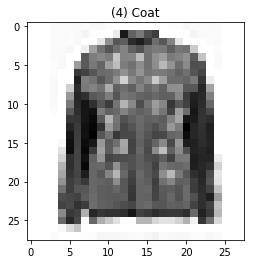

In [12]:
idx = 5
plt.imshow(train[:,idx].reshape(28,28), cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("on")
plt.title(get_label_name(labels[:,idx]))
plt.show()

# 1 layer with softmax

In [13]:
def build_model_layers(number_neurons):
    n_dim = 784
    tf.reset_default_graph()

    
    
    # Number of neurons in the layers
    n1 = number_neurons # Number of neurons in layer 1
    n2 = number_neurons # Number of neurons in layer 2 
    n3 = number_neurons
    n4 = 10
    #n5 = 10 # Neurons for the softmax function

    cost_history = np.empty(shape=[0], dtype = float)
    learning_rate = tf.placeholder(tf.float32, shape=())

    stddev_f = 0.1

    tf.set_random_seed(5)

    X = tf.placeholder(tf.float32, [n_dim, None])
    Y = tf.placeholder(tf.float32, [10, None])
    W1 = tf.Variable(tf.random_normal([n1, n_dim], stddev=stddev_f)) 
    b1 = tf.Variable(tf.constant(0.0, shape = [n1,1]) )
    W2 = tf.Variable(tf.random_normal([n2, n1], stddev=stddev_f)) 
    b2 = tf.Variable(tf.constant(0.0, shape = [n2,1])) 
    W3 = tf.Variable(tf.random_normal([n3,n2], stddev = stddev_f))
    b3 = tf.Variable(tf.constant(0.0, shape = [n3,1]))
    W4 = tf.Variable(tf.random_normal([n4,n3], stddev = stddev_f))
    b4 = tf.Variable(tf.constant(0.0, shape = [n4,1]))
    #W5 = tf.Variable(tf.truncated_normal([n5,n4], stddev = stddev_f))
    #b5 = tf.Variable(tf.constant(stddev_f, shape = [n5,1]))

    # Let's build our network...
    Z1 = tf.nn.relu(tf.matmul(W1, X) + b1) # n1 x n_dim * n_dim x n_obs = n1 x n_obs
    Z2 = tf.nn.relu(tf.matmul(W2, Z1) + b2) # n2 x n1 * n1 * n_obs = n2 x n_obs
    Z3 = tf.nn.relu(tf.matmul(W3, Z2) + b3)
    Z4 = tf.matmul(W4, Z3) + b4
    #Z4 = tf.nn.relu(tf.matmul(W4, Z3) + b4)
    #Z5 = tf.matmul(W5,Z4) + b5
    y_ = tf.nn.softmax(Z4,0) # n2 x n_obs (10 x None)


    cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    init = tf.global_variables_initializer()
    
    return optimizer, cost, y_, X, Y, learning_rate

In [14]:
def build_model(number_neurons):
    n_dim = 784
    tf.reset_default_graph()

    # Number of neurons in the layers
    n1 = number_neurons# Number of neurons in layer 1
    n2 = 10 # Number of neurons in output layer 

    cost_history = np.empty(shape=[1], dtype = float)
    learning_rate = tf.placeholder(tf.float32, shape=())

    X = tf.placeholder(tf.float32, [n_dim, None])
    Y = tf.placeholder(tf.float32, [10, None])
    W1 = tf.Variable(tf.truncated_normal([n1, n_dim], stddev=.1)) 
    b1 = tf.Variable(tf.constant(0.1, shape = [n1,1]) )
    W2 = tf.Variable(tf.truncated_normal([n2, n1], stddev=.1)) 
    b2 = tf.Variable(tf.constant(0.1, shape = [n2,1])) 

    # Let's build our network...
    Z1 = tf.nn.relu(tf.matmul(W1, X) + b1) # n1 x n_dim * n_dim x n_obs = n1 x n_obs
    Z2 = tf.matmul(W2, Z1) + b2 # n2 x n1 * n1 * n_obs = n2 x n_obs
    y_ = tf.nn.softmax(Z2,0) # n2 x n_obs (10 x None)

    cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    init = tf.global_variables_initializer()
    
    return optimizer, cost, y_, X, Y, learning_rate

In [15]:
def model_layers(minibatch_size, training_epochs, features, classes, logging_step = 100, 
                 learning_r = 0.001, number_neurons = 15, debug = False):
    
    opt, c, y_, X, Y, learning_rate = build_model_layers(number_neurons)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]

            #if (i % 5000 == 0):
            #    print('i = ',i)
            
            sess.run(opt, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(c, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if ((epoch % logging_step == 0) & debug):
                print("Reached epoch",epoch,"cost J =", cost_)
                
    correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
    accuracy_train = accuracy.eval({X: train, Y: labels_, learning_rate: 0.001}, session = sess)
    accuracy_test = accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.001}, session = sess)
                
    return accuracy_train, accuracy_test, sess, cost_history

In [16]:
def model(minibatch_size, training_epochs, features, classes, logging_step = 100, learning_r = 0.001, number_neurons = 15):
    
    opt, c, y_, X, Y, learning_rate = build_model(number_neurons)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]

            #if (i % 5000 == 0):
            #    print('i = ',i)
            
            sess.run(opt, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(c, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if (epoch % logging_step == 0):
                print("Reached epoch",epoch,"cost J =", cost_)
                
    correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
    accuracy_train = accuracy.eval({X: train, Y: labels_, learning_rate: learning_r}, session = sess)
    accuracy_test = accuracy.eval({X: test, Y: labels_test_, learning_rate: learning_r}, session = sess)
                
    return accuracy_train, accuracy_test, sess, cost_history

In [20]:
%%time
acc_train, acc_test, sess, cost_history = model(minibatch_size = 50, 
                              training_epochs = 50, 
                              features = train, 
                              classes = labels_, 
                              logging_step = 10,
                              learning_r = 0.001,
                              number_neurons = 15)

print(acc_train)
print(acc_test)

Reached epoch 0 cost J = 0.32642397
Reached epoch 10 cost J = 0.30189896
Reached epoch 20 cost J = 0.24828354
Reached epoch 30 cost J = 0.19529264
Reached epoch 40 cost J = 0.16858627
Reached epoch 50 cost J = 0.15351932
0.6648
0.6616
Wall time: 1min 30s


# Exercise 1

Using grid search find the optimal number of neurons in the layer that gives you the best accuracy. With optimal is meant big enough but not too big. After a certain number, increasing the number will not help anymore. Try to finda  good balance between number of neurons and time required for training training.

You can use a code similar to the following.

In [ ]:
nn = [1,5,10,15,25,30, 50, 150]
for nn_ in nn:
    acc_train, acc_test, sess, cost_history = model(minibatch_size = 50, 
                              training_epochs = 50, 
                              features = train, 
                              classes = labels_, 
                              logging_step = 50,
                              learning_r = 0.001,
                              number_neurons = nn_)
    print('Number:',nn_,'Acc. Train:', acc_train, 'Acc. Test', acc_test)

# Exercise 2 - Find the best learning rate and number of neurons with random and logarithmic search

Do hyperparameter tuning for

- Learning rate
- Number of neurons

using random search and for the learning rate logarithimc search. 

You can use the following code as example.

- Try the code with a different number of randomly selected values.

In [21]:
neurons_ = np.random.randint(low=35, high=60.0, size=(10))

r = -np.random.random([10])*4.0

learning_ = 10**r

In [22]:
learning_

array([1.17655096e-04, 5.86204655e-02, 1.04542655e-02, 2.23468096e-04,
       6.66085557e-01, 1.90703727e-01, 9.20111902e-03, 4.61827071e-01,
       5.22271634e-02, 7.82464921e-03])

In [ ]:
for i in range(len(neurons_)):
    acc_train, acc_test, sess, cost_history = model_layers(minibatch_size = 50, 
                              training_epochs = 50, 
                              features = train, 
                              classes = labels_, 
                              logging_step = 50,
                              learning_r = learning_[i],
                              number_neurons = neurons_[i], debug = False)
    print('Number:',neurons_[i],'learning', learning_[i], 'Acc. Train:', acc_train, 'Acc. Test', acc_test)

# Exercise 3 - Optimise learning rate, number of neurons and mini-batch size (with random search)

Do hyperparameter tuning for

- Learning rate
- Number of neurons
- mini-batch size

using random search and for the learning rate logarithimc search. 

You can use the following code as example.

- Try the code with a different number of randomly selected values.

In [23]:
neurons_ = np.random.randint(low=35, high=60.0, size=(5))

r = -np.random.random([10])*4.0

learning_ = 10**r

mb_size_ = np.random.randint(low=20, high=80, size = 5)

In [113]:
mb_size_

array([66, 40, 70, 71, 51])

In [ ]:
for i in range(len(neurons_)):
    #print('Number:',neurons_[i],'learning', learning_[i])
    acc_train, acc_test, sess, cost_history = model_layers(minibatch_size = mb_size_[i], 
                              training_epochs = 50, 
                              features = train, 
                              classes = labels_, 
                              logging_step = 50,
                              learning_r = learning_[i],
                              number_neurons = neurons_[i], debug = False)
    print('Number:',neurons_[i],'learning', learning_[i], 'mb size',mb_size_[i],
          'Acc. Train:', acc_train, 'Acc. Test', acc_test)

# Let's test it with Adam optimizer

In [24]:
def build_model_layers(number_neurons):
    n_dim = 784
    tf.reset_default_graph()

    
    
    # Number of neurons in the layers
    n1 = number_neurons # Number of neurons in layer 1
    n2 = number_neurons # Number of neurons in layer 2 
    n3 = number_neurons
    n4 = 10

    cost_history = np.empty(shape=[0], dtype = float)
    learning_rate = tf.placeholder(tf.float32, shape=())

    stddev_f = 0.1

    tf.set_random_seed(5)

    X = tf.placeholder(tf.float32, [n_dim, None])
    Y = tf.placeholder(tf.float32, [10, None])
    W1 = tf.Variable(tf.random_normal([n1, n_dim], stddev=stddev_f)) 
    b1 = tf.Variable(tf.constant(0.0, shape = [n1,1]) )
    W2 = tf.Variable(tf.random_normal([n2, n1], stddev=stddev_f)) 
    b2 = tf.Variable(tf.constant(0.0, shape = [n2,1])) 
    W3 = tf.Variable(tf.random_normal([n3,n2], stddev = stddev_f))
    b3 = tf.Variable(tf.constant(0.0, shape = [n3,1]))
    W4 = tf.Variable(tf.random_normal([n4,n3], stddev = stddev_f))
    b4 = tf.Variable(tf.constant(0.0, shape = [n4,1]))
    #W5 = tf.Variable(tf.truncated_normal([n5,n4], stddev = stddev_f))
    #b5 = tf.Variable(tf.constant(stddev_f, shape = [n5,1]))

    # Let's build our network...
    Z1 = tf.nn.relu(tf.matmul(W1, X) + b1) # n1 x n_dim * n_dim x n_obs = n1 x n_obs
    Z2 = tf.nn.relu(tf.matmul(W2, Z1) + b2) # n2 x n1 * n1 * n_obs = n2 x n_obs
    Z3 = tf.nn.relu(tf.matmul(W3, Z2) + b3)
    Z4 = tf.matmul(W4, Z3) + b4
    #Z4 = tf.nn.relu(tf.matmul(W4, Z3) + b4)
    #Z5 = tf.matmul(W5,Z4) + b5
    y_ = tf.nn.softmax(Z4,0) # n2 x n_obs (10 x None)


    cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
    optimizer = optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate, 
                                                   beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8).minimize(cost)

    init = tf.global_variables_initializer()
    
    return optimizer, cost, y_, X, Y, learning_rate

In [25]:
def model_layers(minibatch_size, training_epochs, features, classes, logging_step = 100, 
                 learning_r = 0.001, number_neurons = 15, debug = False):
    
    opt, c, y_, X, Y, learning_rate = build_model_layers(number_neurons)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]

            #if (i % 5000 == 0):
            #    print('i = ',i)
            
            sess.run(opt, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(c, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if ((epoch % logging_step == 0) & debug):
                print("Reached epoch",epoch,"cost J =", cost_)
                
    correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
    accuracy_train = accuracy.eval({X: train, Y: labels_, learning_rate: 0.001}, session = sess)
    accuracy_test = accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.001}, session = sess)
                
    return accuracy_train, accuracy_test, sess, cost_history

# Complete hyperparameter tuning 

In [135]:
neurons_ = np.random.randint(low=35, high=60.0, size=(20))

r = -np.random.random([20])*(6-5)-5

learning_ = 10**r

mb_size_ = np.random.randint(low=20, high=80, size = 20)

epochs_ = np.random.randint(low = 40, high = 100, size = (20))

In [136]:
for i in range(len(neurons_)):
    #print('Number:',neurons_[i],'learning', learning_[i])
    acc_train, acc_test, sess, cost_history = model_layers(minibatch_size = mb_size_[i], 
                              training_epochs = epochs_[i], 
                              features = train, 
                              classes = labels_, 
                              logging_step = 10,
                              learning_r = learning_[i],
                              number_neurons = neurons_[i], debug = False)
    print('epochs:', epochs_[i], 'Number:',neurons_[i],'learning', learning_[i], 'mb size',mb_size_[i],
          'Acc. Train:', acc_train, 'Acc. Test', acc_test)

epochs: 65 Number: 46 learning 3.75743361986e-06 mb size 20 Acc. Train: 0.838683 Acc. Test 0.8407
epochs: 54 Number: 37 learning 7.12390609733e-06 mb size 56 Acc. Train: 0.8246 Acc. Test 0.8241
epochs: 42 Number: 37 learning 2.14766290607e-06 mb size 45 Acc. Train: 0.712933 Acc. Test 0.7131
epochs: 70 Number: 39 learning 5.59340704666e-06 mb size 76 Acc. Train: 0.814483 Acc. Test 0.8107
epochs: 83 Number: 50 learning 8.14470677233e-06 mb size 32 Acc. Train: 0.1 Acc. Test 0.1
epochs: 60 Number: 44 learning 3.97668096387e-06 mb size 58 Acc. Train: 0.8123 Acc. Test 0.815
epochs: 52 Number: 35 learning 2.11130468914e-06 mb size 78 Acc. Train: 0.691283 Acc. Test 0.6906
epochs: 70 Number: 43 learning 4.94147290757e-06 mb size 32 Acc. Train: 0.837283 Acc. Test 0.8374
epochs: 70 Number: 44 learning 8.09986058619e-06 mb size 59 Acc. Train: 0.847767 Acc. Test 0.8477
epochs: 46 Number: 35 learning 3.28760183015e-06 mb size 37 Acc. Train: 0.779567 Acc. Test 0.777
epochs: 51 Number: 46 learning 3.1